# Financial inclusion In Africa Data Science East Africa

The objective of this competition is to create a machine learning model to predict which individuals are most likely to have or use a bank account. The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


In [2]:
#Importing the Datasets
train =pd.read_csv("Train_V2.csv")
test =pd.read_csv("Test_V2.csv")
varDef =pd.read_csv("VariableDefinitions.csv")
submissions =pd.read_csv("SubmissionFile.csv")

In [3]:
train

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [4]:
train.shape

(23524, 13)

In [5]:
test.shape

(10086, 12)

In [6]:
#Checking Nullability
test.isnull().sum()

country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

we can conclude that there are no null values in our training dataset.

In [7]:
#Checking for duplicates
train.duplicated().sum()

0

We can conclude that there are no duplicated values in our dataframe

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


# Data Visualization

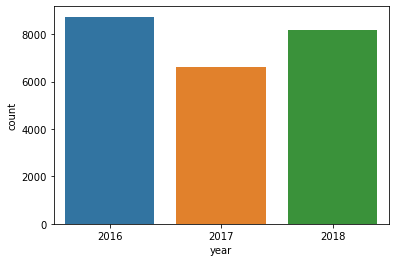

In [9]:
sns.countplot(x="year",data = train)

From the above chart we can conclude that the number of people who had  bank accounts in 2017 were less compared to 2016 and 2018
,
2016 topped with approximately 8500

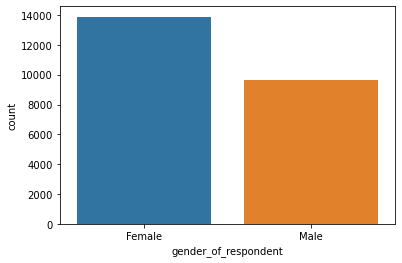

In [10]:
sns.countplot(x="gender_of_respondent", data =train)

From the analysis above, there are more females who  have no bank account than men in the three countries.

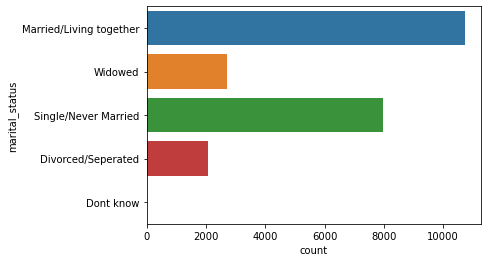

In [11]:
sns.countplot(y="marital_status",data = train)

From the Analysis above there are more people who are married and Living together that is around 10500,and about 2000 people who have bank accounts are divorced

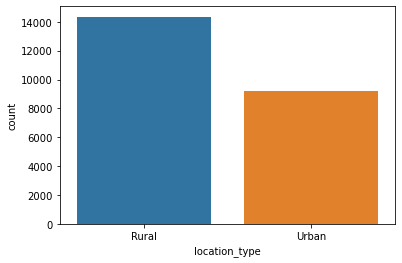

In [12]:
sns.countplot(x="location_type",data = train)

From the anaysis around 14000 people who live in Rural areas do not have  a bank account and  around 9000 people who live in urban areas have a bank account.

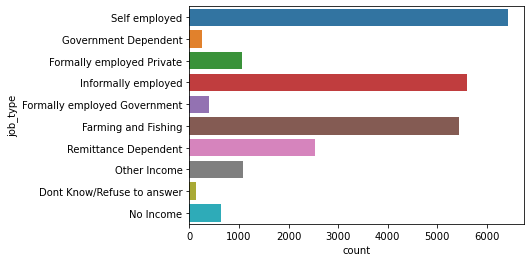

In [13]:
sns.countplot(y = "job_type", data =train)

The biggest population that has  a bank account is that of self employed

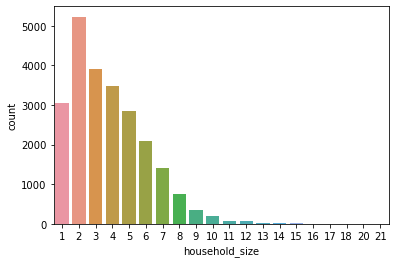

In [14]:
sns.countplot(x="household_size", data =train)

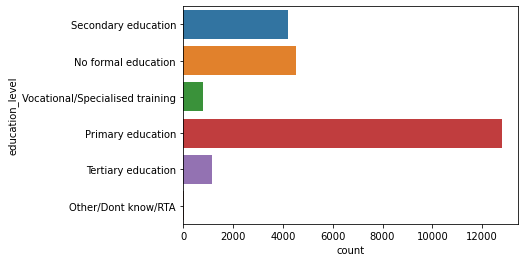

In [15]:
sns.countplot(y="education_level", data =train)

Most of the people who do not have a bank account are the people who are educated upto primary school.

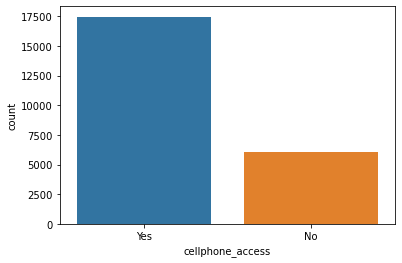

In [19]:
sns.countplot(x="cellphone_access", data =train)

More people who have cellphone access have a bank account as compared to those who do not have a bank account

# Bivariate Analysis


The simultaneous analysis of two variables (attributes). It explores the concept of relationship between two variables, whether there exists an association and the strength of this association, or whether there are differences between two variables and the significance of these differences.

In [20]:
train.head(5)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


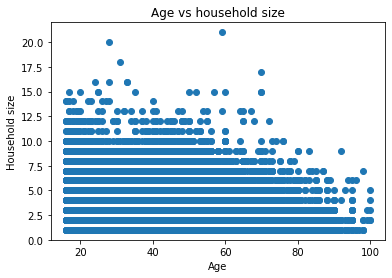

In [54]:

#scatter plot 
#Age vs household size
plt.scatter(train["age_of_respondent"],train["household_size"])
plt.title("Age vs household size")
plt.xlabel("Age")
plt.ylabel("Household size")
plt.show()


The distribution is not normal, but is inclined more to the young people as compared to the old people


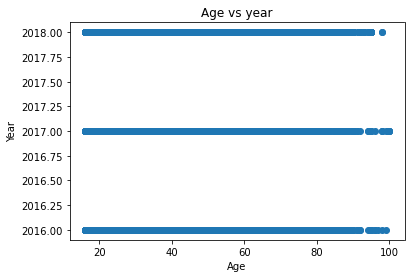

In [57]:

#scatter plot between age and year
plt.scatter(train["age_of_respondent"],train["year"])
plt.title("Age vs year")
plt.xlabel("Age")
plt.ylabel("Year")
plt.show()


In each of those years the distribution starts becoming scarce as we progress to the older people

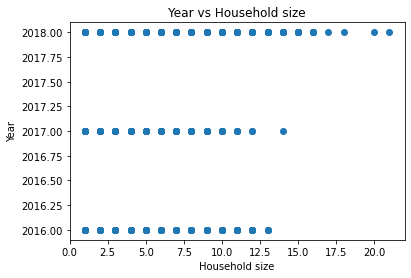

In [62]:
#year vs household size
plt.scatter(train['household_size'],train['year'])
plt.title('Year vs Household size')
plt.xlabel('Household size')
plt.ylabel('Year')
plt.show()

the transition from 2016 to 2017 showed a reduction in the household size by the families in the survey, but the number showed a steady increse in the year 2018.

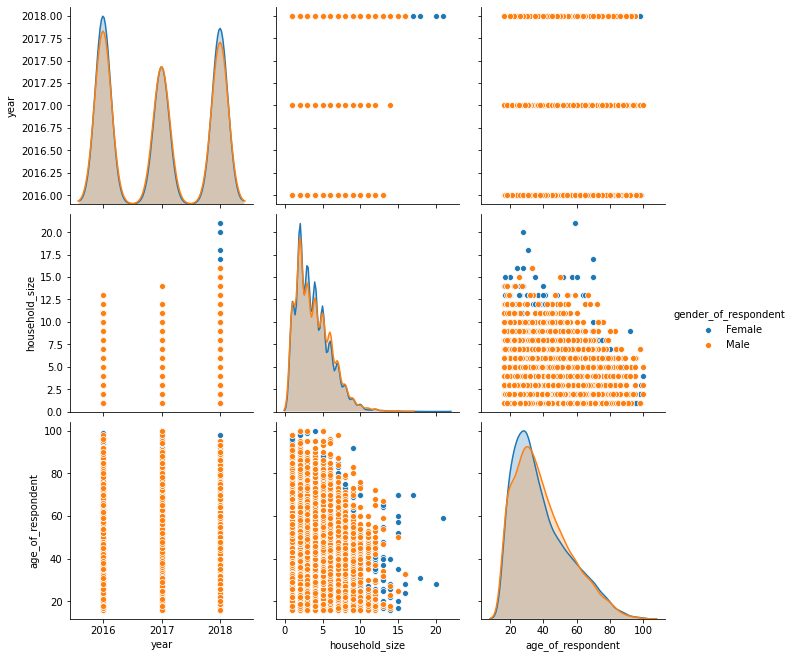

In [21]:
sns.pairplot(train,hue="gender_of_respondent",height =3)
plt.show()

In [23]:
train.head(5)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [26]:
train.drop(['uniqueid'],axis=1, inplace =True)

In [29]:
train.head(5)

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [33]:
#Detecting Anomalies
train.year.unique()

array([2018, 2016, 2017], dtype=int64)

In [35]:
train.dtypes

country                   object
year                       int64
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

In [42]:
train.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [43]:
train.skew()

year                 0.045664
household_size       0.988200
age_of_respondent    0.841686
dtype: float64

In [44]:
train.corr()

,year,household_size,age_of_respondent
year,1.000000,-0.052264,-0.019330
household_size,-0.052264,1.000000,-0.129729
age_of_respondent,-0.019330,-0.129729,1.000000


In [47]:
bank = train.groupby(["bank_account", "country"])
bank

In [49]:
bank.describe()

year                                               \
                        count    mean  std     min     25%     50%     75%   
bank_account country                                                         
No           Kenya     4547.0  2018.0  0.0  2018.0  2018.0  2018.0  2018.0   
             Rwanda    7732.0  2016.0  0.0  2016.0  2016.0  2016.0  2016.0   
             Tanzania  6013.0  2017.0  0.0  2017.0  2017.0  2017.0  2017.0   
             Uganda    1920.0  2018.0  0.0  2018.0  2018.0  2018.0  2018.0   
Yes          Kenya     1521.0  2018.0  0.0  2018.0  2018.0  2018.0  2018.0   
             Rwanda    1003.0  2016.0  0.0  2016.0  2016.0  2016.0  2016.0   
             Tanzania   607.0  2017.0  0.0  2017.0  2017.0  2017.0  2017.0   
             Uganda     181.0  2018.0  0.0  2018.0  2018.0  2018.0  2018.0   

                              household_size            ...             \
                          max          count      mean  ...  75%   max   
bank_account country                                    ...              
No           Kenya     2018.0         4547.0  4.181218  ...  6.0  21.0   
             Rwanda    2016.0         7732.0  4.460166  ...  6.0  13.0   
             Tanzania  2017.0         6013.0  2.353068  ...  3.0  14.0   
             Uganda    2018.0         1920.0  5.012500  ...  7.0  20.0   
Yes          Kenya     2018.0         1521.0  3.407627  ...  5.0  15.0   
             Rwanda    2016.0         1003.0  4.646062  ...  6.0  12.0   
             Tanzania  2017.0          607.0  2.242175  ...  3.0   8.0   
             Uganda    2018.0          181.0  4.734807  ...  6.0  17.0   

                      age_of_respondent                                    \
                                  count       mean        std   min   25%   
bank_account country                                                        
No           Kenya               4547.0  39.195514  17.731470  16.0  25.0   
             Rwanda              7732.0  39.334584  16.643389  16.0  27.0   
             Tanzania            6013.0  38.441710  16.713511  16.0  25.0   
             Uganda              1920.0  35.519792  15.541490  16.0  23.0   
Yes          Kenya               1521.0  40.874425  15.494588  16.0  29.0   
             Rwanda              1003.0  38.972084  13.078041  16.0  30.0   
             Tanzania             607.0  38.855025  13.365097  17.0  28.0   
             Uganda               181.0  34.834254  12.491559  17.0  26.0   

                                          
                        50%   75%    max  
bank_account country                      
No           Kenya     35.0  50.0   95.0  
             Rwanda    35.0  50.0   99.0  
             Tanzania  35.0  48.0  100.0  
             Uganda    31.0  45.0   98.0  
Yes          Kenya     38.0  50.0   95.0  
             Rwanda    36.0  45.0   95.0  
             Tanzania  36.0  47.0   86.0  
             Uganda    31.0  40.0   75.0  

[8 rows x 24 columns]

From the above observation, numerous people have no bank account.With Rwanda topping the list.Clearly stating that the most needs to be done in the country.Closely followed by Tanzania,Kenya then Uganda. The number of people with financial inclusion proved to be less than the overall number of people with no financial inclusion, with Kenya topping the list followed by Rwanda,Tanzania then Uganda.

In [52]:
bank2 =train.groupby(['bank_account','year'])
bank2.describe()

household_size                                          \
                           count      mean       std  min  25%  50%  75%   
bank_account year                                                          
No           2016         7732.0  4.460166  1.978632  1.0  3.0  4.0  6.0   
             2017         6013.0  2.353068  1.268472  1.0  2.0  2.0  3.0   
             2018         6467.0  4.428019  2.563310  1.0  2.0  4.0  6.0   
Yes          2016         1003.0  4.646062  1.981791  1.0  3.0  5.0  6.0   
             2017          607.0  2.242175  1.178325  1.0  1.0  2.0  3.0   
             2018         1702.0  3.548766  2.263824  1.0  2.0  3.0  5.0   

                        age_of_respondent                                    \
                    max             count       mean        std   min   25%   
bank_account year                                                             
No           2016  13.0            7732.0  39.334584  16.643389  16.0  27.0   
             2017  14.0            6013.0  38.441710  16.713511  16.0  25.0   
             2018  21.0            6467.0  38.104221  17.191610  16.0  25.0   
Yes          2016  12.0            1003.0  38.972084  13.078041  16.0  30.0   
             2017   8.0             607.0  38.855025  13.365097  17.0  28.0   
             2018  17.0            1702.0  40.232080  15.313946  16.0  28.0   

                                      
                    50%   75%    max  
bank_account year                     
No           2016  35.0  50.0   99.0  
             2017  35.0  48.0  100.0  
             2018  34.0  49.0   98.0  
Yes          2016  36.0  45.0   95.0  
             2017  36.0  47.0   86.0  
             2018  37.0  50.0   95.0

From the above observation it is clearly seen that in the year 2016 there were more people who had no bank accounts,followed by 2018,followed by 2017.

In [63]:
import dask.dataframe as dd
dummy = dd.get_dummies(train)
dummy.head()

,year,household_size,age_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,bank_account_No,bank_account_Yes,location_type_Rural,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,2018,3,24,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
1,2018,5,70,1,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
2,2018,5,26,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,2018,5,34,1,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
4,2018,8,26,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [65]:
dummy.shape

(23524, 42)

In [67]:
#Preprocessing
#Dividing my features into the feature set and corresponding labels: X and Y respectively.
x = train.drop("bank_account",1)
y = train["bank_account"]
x.head()

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [69]:
#creating dummy for the categorical data
x = pd.get_dummies(x)
x

,year,household_size,age_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,location_type_Rural,location_type_Urban,cellphone_access_No,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,2018,3,24,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2018,5,70,1,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
2,2018,5,26,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,2018,5,34,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2018,8,26,1,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,2018,4,48,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
23520,2018,2,27,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
23521,2018,5,27,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
23522,2018,7,30,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


# Modelling

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [71]:
#splitting the dats into training and test set
x_train, x_test, y_train, y_test = train_test_split(x,y)
x_train, x_test, y_train, y_test

(       year  household_size  age_of_respondent  country_Kenya  country_Rwanda  \
 49     2018               3                 28              1               0   
 8616   2016               4                 18              0               1   
 17794  2017               2                 31              0               0   
 15958  2017               4                 40              0               0   
 4723   2018               1                 50              1               0   
 ...     ...             ...                ...            ...             ...   
 13505  2016               2                 26              0               1   
 17811  2017               2                 21              0               0   
 12026  2016               3                 83              0               1   
 1087   2018               3                 30              1               0   
 3176   2018               4                 65              1               0   
 
        countr

In [72]:
#Standardisation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train
x_test

array([[-1.14415363, -0.36107825, -0.89500926, ..., -0.22246664,
        -0.34535002, -0.61195883],
       [ 1.21557546,  0.53403255,  0.37721848, ..., -0.22246664,
        -0.34535002,  1.63409685],
       [-1.14415363,  1.42914335,  0.25605393, ..., -0.22246664,
        -0.34535002, -0.61195883],
       ...,
       [-1.14415363,  0.53403255,  0.68012985, ..., -0.22246664,
        -0.34535002, -0.61195883],
       [ 1.21557546,  0.98158795,  2.61876259, ..., -0.22246664,
         2.89561297, -0.61195883],
       [ 1.21557546,  0.53403255, -0.89500926, ..., -0.22246664,
        -0.34535002, -0.61195883]])

In [73]:
x_test.shape

(5881, 40)

In [74]:
y_test.shape

(5881,)

In [76]:
#Using 1 Principal Component
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
x_test

array([[-2.34126766],
       [ 0.28064427],
       [-2.50880436],
       ...,
       [-2.35073966],
       [-0.13542198],
       [-0.57571632]])

In [77]:
#Training our model and Making predictions using 1 Principal component
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [78]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[5018    0]
 [ 863    0]]
Accuracy 0.8532562489372556
